<a href="https://colab.research.google.com/github/Antoniomms87/Thinkful-Final-Capstone-Python/blob/main/Final_Capstone_Thinkful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Capstone: Final Project


**Notebook Description**

**Context:**

I aim to get some explanations and insights regarding one of the most critical and challenging topics within the our society: Gun Violence & Mass Shootings in the US.

**Description of the Data:**

1. Title - Place´s Name where the incident took place

2. Location - Particular place where the incident took place

3. Date - The day of the month or year as specified

4. Target - The person or group that someone is trying to attack

5. Cause - The main reason and purpose of the attacker (if known)

6. Fatalities - Total number of people who died because of the incident

7. Injured - Total number of people who were injured because of the incident

8. Total victims - Sum of Total number of people involved (Fatalities + Injured)

9. Age - Age of the attacker(s)

10. Gender - This is the policy holder's gender, either male or female

**Objective Hypothesis**

I want to examine whether there is a significant difference in the proportion of US Mass Shootings from before and after 1991.

Ho: p1 - p2 = 0

Ha: p1 - p2 ≠ 0

Does Mental Health & Age play a role in the occurrence of Mass Shootings? 

Ho: p1 - p2 = 0 There is no difference between Attacker/s with Mental Healh problems and Age 

Ha: p1 - p2 ≠ 0 There is difference between Attacker/s with Mental Healh problems and Age. 

**Disclaimer:**

To gain a broader perspective on the topic. I attach some extra resources: 

https://everytownresearch.org/maps/mass-shootings-in-america-2009-2019/
https://time.com/5947893/what-constitutes-a-mass-shooting/
https://crim.sas.upenn.edu/fact-check/what-mass-shooting-what-can-be-done
https://fas.org/sgp/crs/misc/R44126.pdf









# **Basic Data Structures**

In [43]:
#import libraries

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import statistics as stats2

!pip install pyproj==1.9.6

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import seaborn as sns
sns.set()
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy.stats as sp
import os
from datetime import datetime
from scipy.stats import ttest_ind as ttest
from IPython.core.interactiveshell import InteractiveShell
%config InteractiveShell.ast_node_interactivity = 'all'

#configure jupyter to allow each cell to display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [44]:
# import dataset
from google.colab import files
uploaded = files.upload()

Saving US Mass Shooting 1966-2019.csv to US Mass Shooting 1966-2019 (1).csv


In [45]:
# import dataset
df = pd.read_csv('US Mass Shooting 1966-2019 (1).csv')

In [22]:
# Get the number of rows
n_data = len(df)
print(f"We have {n_data} data rows.")

We have 339 data rows.


In [10]:
# Returns the first 3 rows of the dataframe
df.head(3)

,S#,Title,Location,State,Date,Year,Area,Incident Area,Open/Close Location,Target,Cause,Summary,Shooter status,No. of shooter/suspect,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Year.1,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",Nevada,10/1/2017,2017,Public area,Las Vegas Strip Concert outside Mandala Bay,Open,random,-999,"Stephen Craig Paddock, opened fire from the 32...",committed suicide,one,58,527,585,1,64,-999,-999,-999,"White, White American or European American",Male,36.181271,-115.134132,2017,NaN,NaN,NaN,NaN
1,2,Orlando nightclub massacre,"Orlando, Florida",Florida,6/12/2016,2016,"Bar, Club",at nightclub,Close,random,-999,"Omar Mateen, 29, attacked the Pulse nighclub i...",killed,one,49,53,102,0,29,-999,-999,-999,Other,Male,28.519718,-81.376777,2016,NaN,NaN,NaN,NaN
2,3,Virginia Tech massacre,"Blacksburg, Virginia",Virginia,4/16/2007,2007,School,School Campus,Close,random,terrorism,"Virginia Tech student Seung-Hui Cho, 23, opene...",committed suicide,one,32,23,55,0,23,-999,-999,Yes,Asian or Asian American,Male,37.229573,-80.413939,2007,NaN,NaN,NaN,NaN


In [11]:
# Columns attribute return the column labels of our given Dataframe
df.columns

Index(['S#', 'Title', 'Location', 'State', 'Date', 'Year', 'Area',
       'Incident Area', 'Open/Close Location', 'Target', 'Cause', 'Summary',
       'Shooter status', 'No. of shooter/suspect', 'Fatalities', 'Injured',
       'Total victims', 'Policeman Killed', 'Age', 'Employeed (Y/N)',
       'Employed at', 'Mental Health Issues', 'Race', 'Gender', 'Latitude',
       'Longitude', 'Year.1', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30'],
      dtype='object')

In [21]:
# used to print a concise summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S#                      339 non-null    int64  
 1   Title                   339 non-null    object 
 2   Location                339 non-null    object 
 3   State                   339 non-null    object 
 4   Date                    339 non-null    object 
 5   Year                    339 non-null    int64  
 6   Area                    339 non-null    object 
 7   Incident Area           339 non-null    object 
 8   Open/Close Location     339 non-null    object 
 9   Target                  339 non-null    object 
 10  Cause                   339 non-null    object 
 11  Summary                 339 non-null    object 
 12  Shooter status          339 non-null    object 
 13  No. of shooter/suspect  339 non-null    object 
 14  Fatalities              339 non-null    in

In [12]:
# used to view some basic statistical details 
df.describe()

,S#,Year,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Latitude,Longitude,Year.1,Unnamed: 27
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,0.0
mean,170.000000,2008.088496,4.241888,6.315634,10.557522,-100.094395,40.604720,-810.280236,37.073669,-94.477016,2008.088496,NaN
std,98.005102,11.398555,5.697546,29.249955,33.015221,300.570114,18.008958,391.773726,5.515872,16.535140,11.398555,NaN
min,1.000000,1966.000000,0.000000,0.000000,3.000000,-999.000000,11.000000,-999.000000,21.325512,-161.792752,1966.000000,NaN
25%,85.500000,2002.500000,1.000000,1.000000,4.000000,0.000000,25.000000,-999.000000,33.533469,-110.205485,2002.500000,NaN
50%,170.000000,2014.000000,3.000000,3.000000,5.000000,0.000000,39.000000,-999.000000,36.754420,-88.122998,2014.000000,NaN
75%,254.500000,2016.000000,5.000000,5.000000,9.000000,0.000000,54.500000,-999.000000,41.289861,-81.678142,2016.000000,NaN
max,339.000000,2019.000000,58.000000,527.000000,585.000000,5.000000,87.000000,1.000000,60.790539,-69.707823,2019.000000,NaN


In [9]:
# Series with the data type of each column
df.dtypes

S#                          int64
Title                      object
Location                   object
State                      object
Date                       object
Year                        int64
Area                       object
Incident Area              object
Open/Close Location        object
Target                     object
Cause                      object
Summary                    object
Shooter status             object
No. of shooter/suspect     object
Fatalities                  int64
Injured                     int64
Total victims               int64
Policeman Killed            int64
Age                        object
Employeed (Y/N)             int64
Employed at                object
Mental Health Issues       object
Race                       object
Gender                     object
Latitude                  float64
Longitude                 float64
Year.1                      int64
Unnamed: 27               float64
Unnamed: 28                object
Unnamed: 29   

**How many Mass Shootings incidents happened over the analyzed period?** 

Years listed in ascending order

In [13]:
# number of incidents per year
year_counts = df['Year'].value_counts()
year_counts.sort_values()

1990     1
1987     1
1971     1
1972     1
2000     1
1985     2
1982     2
1983     2
1974     2
1979     2
2004     2
2010     2
2001     2
2002     2
1966     2
1976     2
1984     3
1986     3
2003     3
1996     3
2005     3
1989     3
1992     4
1995     4
1994     4
1998     5
1991     5
2009     6
2008     6
2011     6
1997     6
1988     6
2006     6
1999     7
1993     9
2019    10
2007    10
2017    11
2018    12
2014    13
2012    15
2013    16
2015    65
2016    68
Name: Year, dtype: int64


# **Exploratory Data Analysis**

Visually, this Bar Chart allows us to clarify the magnitude of incidents in recent years and how it translates into more Fatalities and Injured (see below).	 

<Figure size 1080x360 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Fatalities')

Text(0.5, 1.0, 'US Mass Shooting 1966-2019')

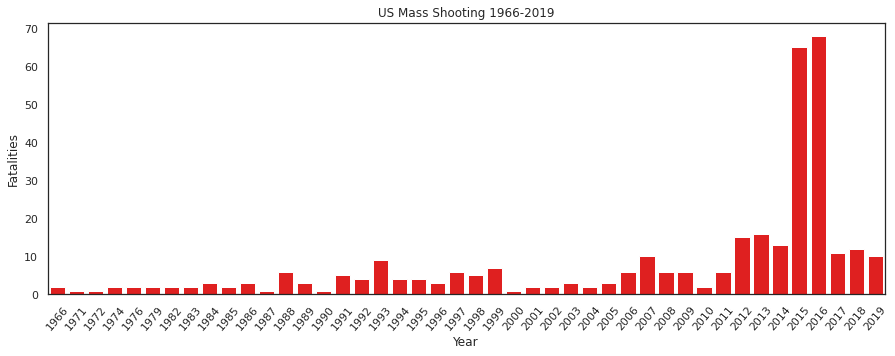

In [129]:
values = df['Year'].value_counts().sort_values(ascending=False)
labels = values.index
clrs=["red"]
sns.set_style("white")
plt.figure(figsize = (15,5))
sns.barplot(y=values, x=labels, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.title('US Mass Shooting 1966-2019');

plt.show()

**What could we infer when we dig into the number of Fatalities and Injured?**

Bar chart nº 1 is clearly stating an increasing number of Fatalities as a result of a Mass Shooting, specially after Year 2010. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

Text(0.5, 1.0, 'NUMBER OF PEOPLE KILLED AND INJURED IN YEARS')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'number of incident')

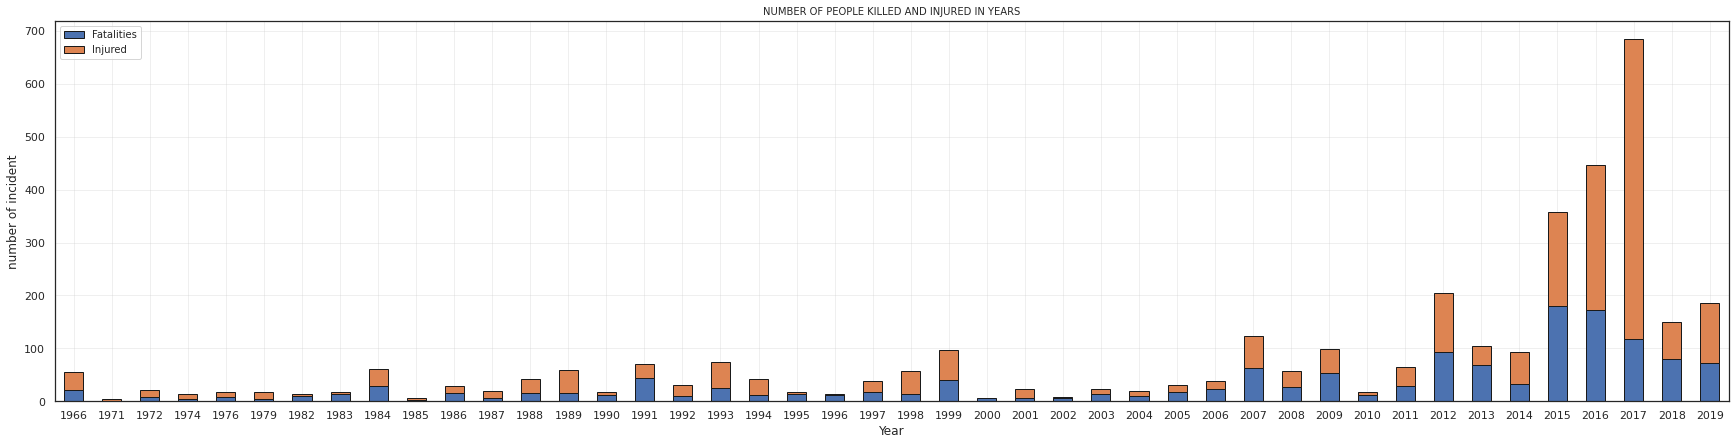

In [27]:
fig = df.groupby("Year")[["Fatalities","Injured"]].sum().plot(kind="bar",stacked=True,
                                                            figsize=(30,7),
                                                            linewidth = 1,
                                                            edgecolor = "k"*df["Year"].nunique())
plt.grid(True,alpha=.3)
plt.xticks(rotation=0)
fig.set_facecolor("white")
plt.legend(prop={"size":10})
plt.title("NUMBER OF PEOPLE KILLED AND INJURED IN YEARS",fontsize = 10)
plt.xlabel('Year')
plt.ylabel('number of incident')

plt.show()

This stocked bar chart number 2 exemplifies the increasing number of Injured + Fatalities due to the mass shooting over the analyzed period. The year 1991 accounts for 16% of the total Injured + Fatalities in that period. This fact is why I dig into that year. 

([<matplotlib.patches.Wedge at 0x7ffb29e4ed90>,
 [Text(1.0673252965504751, 0.2661140945974873, '1966'),
  Text(0.9651679285265585, 0.5276844414455975, '1971'),
  Text(0.8973813803854727, 0.636165590186599, '1972'),
  Text(0.7912737594562795, 0.7641242291642937, '1974'),
  Text(0.6772276012727747, 0.8668118458317953, '1976'),
  Text(0.5499999786312113, 0.9526279565001582, '1979'),
  Text(0.3882235980539114, 1.0292144761487156, '1982'),
  Text(0.08949452291190312, 1.0963533784180952, '1983'),
  Text(-0.4474103146358062, 1.004900000177873, '1984'),
  Text(-0.7823294319596551, 0.7732791603875561, '1985'),
  Text(-0.9328529064163695, 0.5829111896254284, '1986'),
  Text(-1.050046395309143, 0.32772330966575286, '1987'),
  Text(-1.098138974257806, 0.06395930906454507, '1988'),
  Text(-1.0500463953091432, -0.32772330966575264, '1989'),
  Text(-0.8973813989986351, -0.6361655639306898, '1990'),
  Text(-0.3399187201361741, -1.0461621593715698, '1991'),
  Text(0.3399186527963938, -1.04616218125159,

Text(0.5, 1.0, 'PROPORTION OF KILLINGS BY YEAR 1966 - 1995 ')

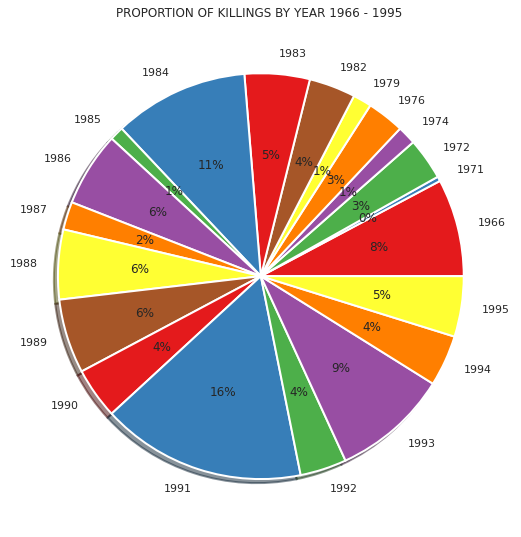

In [61]:
fatalities_year = df.groupby("Year")[["Fatalities","Injured"]].sum().sort_values('Year', ascending=True).head(20)
fig = plt.figure(figsize=(20,60))
plt.subplot(121)
plt.pie(fatalities_year["Fatalities"],labels=fatalities_year.index,autopct="%1.0f%%",shadow=True,
        colors=sns.color_palette("Set1",7),wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.title("PROPORTION OF KILLINGS BY YEAR 1966 - 1995 ",fontsize=12)

fig.set_facecolor("w")

plt.show()

([<matplotlib.patches.Wedge at 0x7ffb29db3e90>,
 [Text(1.0754738655364324, 0.2309891004963739, '2019'),
  Text(0.8723651186675834, 0.6700590270506721, '2018'),
  Text(0.371891744385504, 1.0352277674299057, '2017'),
  Text(-0.5202927738362386, 0.9691725488754791, '2016'),
  Text(-1.0981526791968585, 0.06372356842457669, '2015'),
  Text(-0.932364551659977, -0.5836919930990062, '2014'),
  Text(-0.7242812074925415, -0.8278989868777147, '2013'),
  Text(-0.2744233960512849, -1.0652191322444784, '2012'),
  Text(0.10821540748329263, -1.0946640697415921, '2011'),
  Text(0.23410498438337862, -1.0747999145361236, '2010'),
  Text(0.43416940790782543, -1.010691310557763, '2009'),
  Text(0.6573478873613531, -0.8819828541312842, '2008'),
  Text(0.8605822257708807, -0.6851264355483863, '2007'),
  Text(1.0016759090731522, -0.4545826362527219, '2006'),
  Text(1.048501156323267, -0.33263392068274145, '2005'),
  Text(1.07201386129724, -0.24654873998173657, '2004'),
  Text(1.0865567285080193, -0.1714481721

Text(0.5, 1.0, 'PROPORTION OF KILLINGS BY YEAR 2000 - 2019')

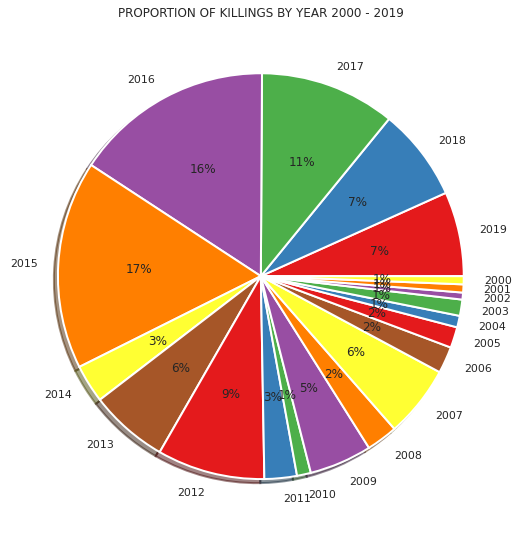

In [62]:
fatalities_year = df.groupby("Year")[["Fatalities","Injured"]].sum().sort_values('Year', ascending=False).head(20)
fig = plt.figure(figsize=(20,60))
plt.subplot(121)
plt.pie(fatalities_year["Fatalities"],labels=fatalities_year.index,autopct="%1.0f%%",shadow=True,
        colors=sns.color_palette("Set1",7),wedgeprops={"linewidth":2,"edgecolor":"white"})

plt.title("PROPORTION OF KILLINGS BY YEAR 2000 - 2019",fontsize=12)

fig.set_facecolor("w")

plt.show()

With this heatmap, I aim to put into perspective the increasing number of Fatalities over the period. The years 2015, 2016, 2017 accounted for +100 victims per year due to a Mass Shooting. 

<Figure size 1440x1080 with 0 Axes>

(array([0.5]), <a list of 1 Text major ticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
 <a list of 44 Text major ticklabel objects>)

Text(156.5, 0.5, 'YEAR')

Text(0.5, 1.0, 'PEOPLE KILLED OVER YEARS')

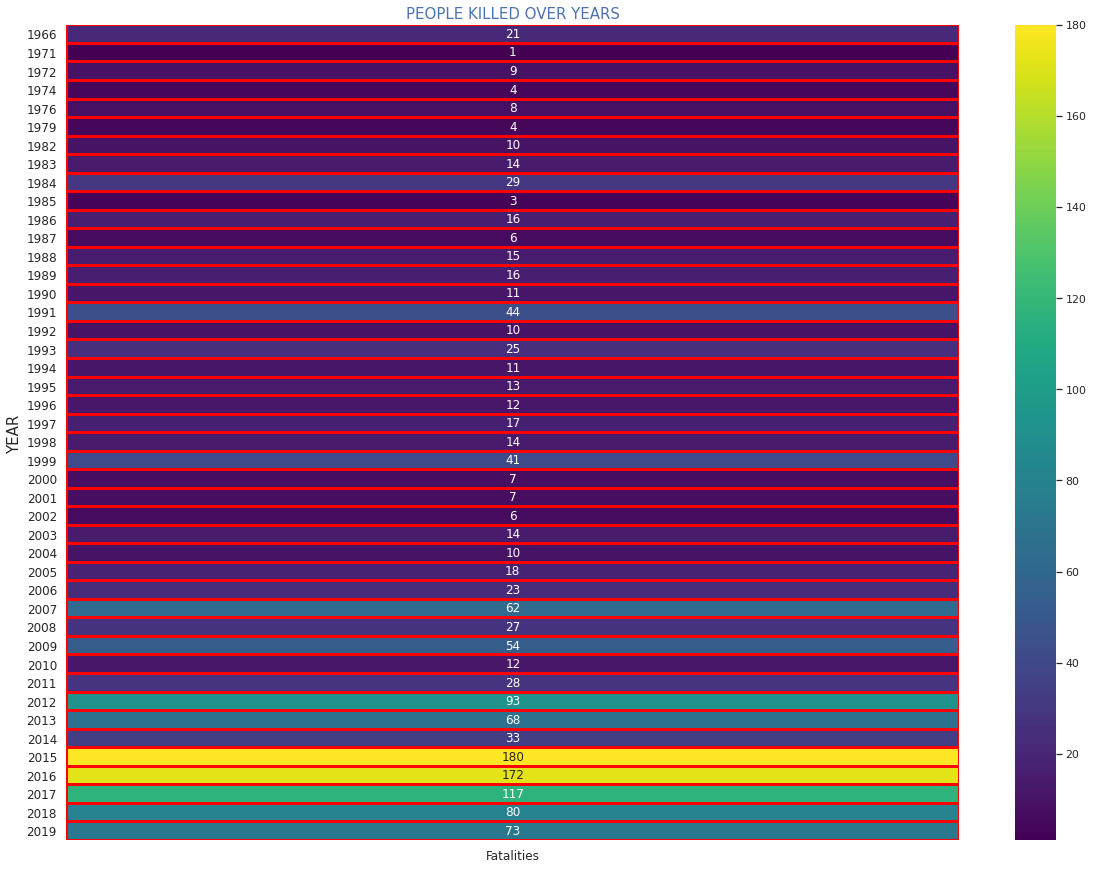

In [48]:
kills_my = pd.pivot_table(columns="Year",data=df,values="Fatalities",aggfunc="sum").fillna(0)

for i in kills_my.columns:
    kills_my[i] = kills_my[i].astype(np.int64)
plt.figure(figsize=(20,15))
fig = sns.heatmap(kills_my.transpose(),cmap="viridis",
                  annot=True,fmt="d",linecolor="red",linewidths=2)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12,rotation=0)
plt.ylabel("YEAR",fontsize=15)
plt.title("PEOPLE KILLED OVER YEARS",fontsize=15,color="b")
plt.show()

**Is there any visual correlation between the analyzed incidents and the month that occurred?**

In [72]:
df["year"] = pd.DatetimeIndex(df["Date"]).year
df["month"]= pd.DatetimeIndex(df["Date"]).month
df["day"]  = pd.DatetimeIndex(df["Date"]).day
df["month"] = df["month"].map({1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"})
df["month_year"] = df["month"]+"-"+df["year"].astype(str)

<Figure size 1440x1080 with 0 Axes>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5]),
 <a list of 44 Text major ticklabel objects>)

Text(156.5, 0.5, 'YEAR')

Text(0.5, 111.5, 'MONTH')

Text(0.5, 1.0, 'PEOPLE KILLED OVER YEARS IN THEIR RESPECTIVE MONTHS')

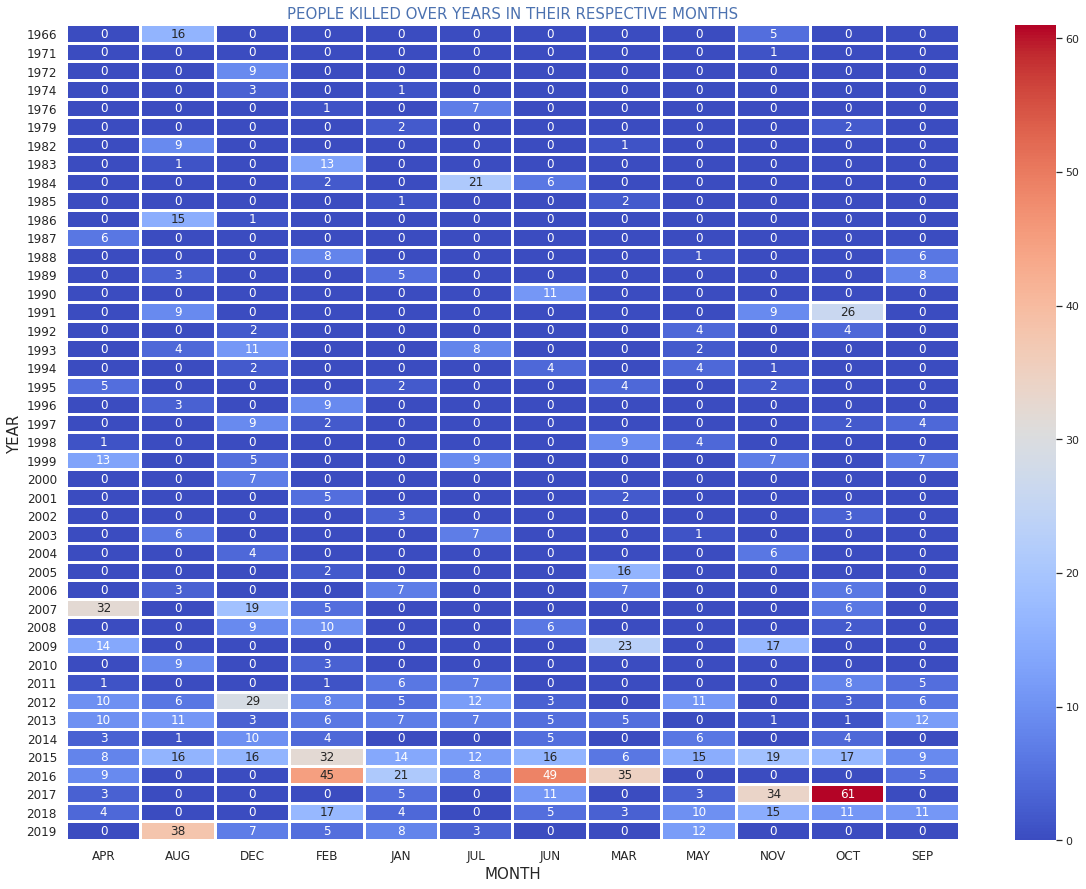

In [75]:
kills_my = pd.pivot_table(index="month",columns="year",data=df,values="Fatalities",aggfunc="sum").fillna(0)

for i in kills_my.columns:
    kills_my[i] = kills_my[i].astype(np.int64)
plt.figure(figsize=(20,15))
fig = sns.heatmap(kills_my.transpose(),cmap="coolwarm",
                  annot=True,fmt="d",linecolor="white",linewidths=2)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12,rotation=0)
plt.ylabel("YEAR",fontsize=15)
plt.xlabel("MONTH",fontsize=15)
plt.title("PEOPLE KILLED OVER YEARS IN THEIR RESPECTIVE MONTHS",fontsize=15,color="b")
plt.show()

**States like California, Texas, Florida, and Washington account the 40% of the total fatalities over the period, and in 2019, these States comprised  30% of the US population.**

Text(0, 0.5, 'STATE')

Text(0.5, 0, 'KILLED')

Text(0.5, 1.0, 'TOP STATES BY DEATHS DUE TO MASS SHOOTING')

Text(0.9, 0, '180')

Text(0.9, 1, '175')

Text(0.9, 2, '149')

Text(0.9, 3, '71')

Text(0.9, 4, '68')

Text(0.9, 5, '57')

Text(0.9, 6, '46')

Text(0.9, 7, '42')

Text(0.9, 8, '42')

Text(0.9, 9, '41')

Text(0.9, 10, '40')

Text(0.9, 11, '40')

Text(0.9, 12, '37')

Text(0.9, 13, '35')

Text(0.9, 14, '32')

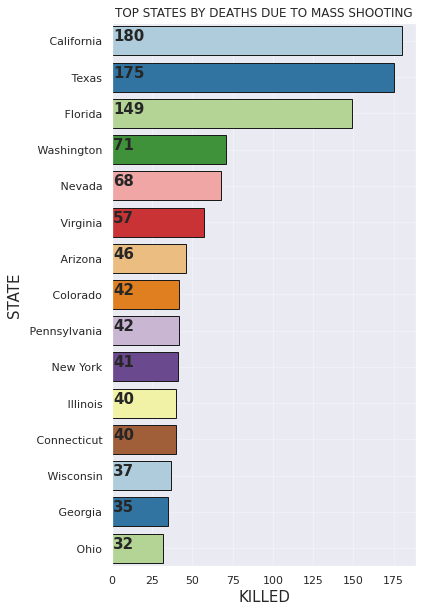

In [49]:
state_kill   = df.groupby("State")["Fatalities"].sum().reset_index().sort_values(by="Fatalities",ascending=False)
fig = plt.figure(figsize=(12,10))
plt.subplot(121)
ax = sns.barplot("Fatalities","State",
                 data=state_kill[:15],palette="Paired",
                 linewidth=1,edgecolor = "k"*15)
plt.ylabel("STATE",fontsize=15)
plt.xlabel("KILLED",fontsize=15)
plt.title("TOP STATES BY DEATHS DUE TO MASS SHOOTING")
for i,j in enumerate(state_kill["Fatalities"][:15]):
    ax.text(.9,i,j,weight="bold",fontsize=15)
plt.grid(True,alpha= .3)    
fig.set_facecolor("w")

<Figure size 936x576 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

Text(0.5, 1.0, 'STATES')

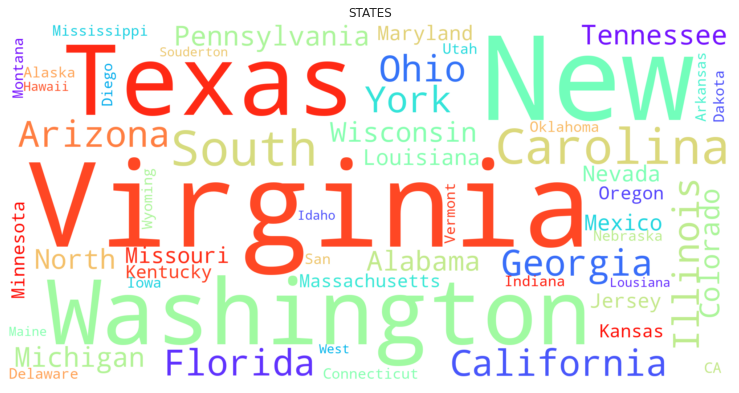

In [50]:
words = df["State"].value_counts().keys()
wc = WordCloud(max_words=60,scale=5,colormap="rainbow",background_color="white").generate(" ".join(words))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("STATES")
plt.show()

***Are US Mass Shootings a Male problem? ***

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7ffb2a304850>,
 [Text(1.1943284269753103, 0.11653157734571817, 'FEMALE'),
  Text(-1.0948010493095883, -0.10682070225674668, 'MALE')],
 [Text(0.6966915824022643, 0.06797675345166893, '3%'),
  Text(-0.5971642087143209, -0.058265837594589094, '97%')])

Text(0.5, 1.0, 'GENDER PROPORTION BY PARTICIPANTS')

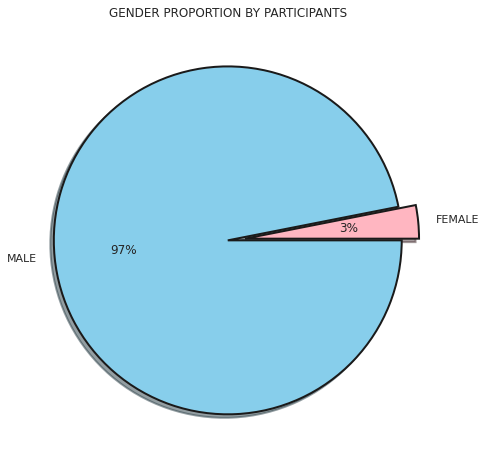

In [56]:
gender = df["Gender"].str.replace("[::0-9|]","").str.upper()
gender = gender.str.replace("FEMALE","F")
gender = gender.str.replace("MALE","M")
gender = pd.DataFrame(gender)
gender = gender[gender["Gender"].notnull()]
gender["female"] = gender["Gender"].str.count("F")
gender["male"]   = gender["Gender"].str.count("M")
size = [sum(gender["female"]),sum(gender["male"])]
plt.figure(figsize=(8,8))
plt.pie(size,labels=["FEMALE","MALE"],shadow=True,colors=["lightpink","skyblue"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0])
plt.title("GENDER PROPORTION BY PARTICIPANTS")
plt.show()

***What about a Mental Health Issue? ***

<Figure size 576x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7ffb29b18710>,
 [Text(-0.20472629453496494, 1.182407351265199, 'Yes'),
  Text(0.18766576999038415, -1.0838734053264323, 'No')],
 [Text(-0.11942367181206287, 0.6897376215713659, '55%'),
  Text(0.10236314726748225, -0.5912036756325993, '45%')])

Text(0.5, 1.0, 'MENTAL HEALTH ISSUES')

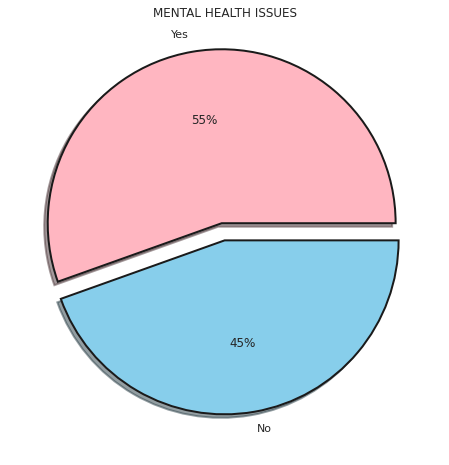

In [66]:
Mental_Health = df["Mental Health Issues"].str.replace("[::0-9|]","").str.upper()
Mental_Health = Mental_Health.str.replace("Yes","Y")
Mental_Health = Mental_Health.str.replace("No","N")
Mental_Health = pd.DataFrame(Mental_Health)
Mental_Health = Mental_Health[Mental_Health["Mental Health Issues"].notnull()]
Mental_Health["Yes"] = Mental_Health["Mental Health Issues"].str.count("Y")
Mental_Health["No"]   = Mental_Health["Mental Health Issues"].str.count("N")
size = [sum(Mental_Health["Yes"]),sum(Mental_Health["No"])]
plt.figure(figsize=(8,8))
plt.pie(size,labels=["Yes","No"],shadow=True,colors=["lightpink","skyblue"],autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0])
plt.title("MENTAL HEALTH ISSUES")
plt.show()

**North Dakota is the only State in the US (States and DC) What could we learn from this place?**


Text(0.5, 1.0, 'Geography of US Mass Shootings')

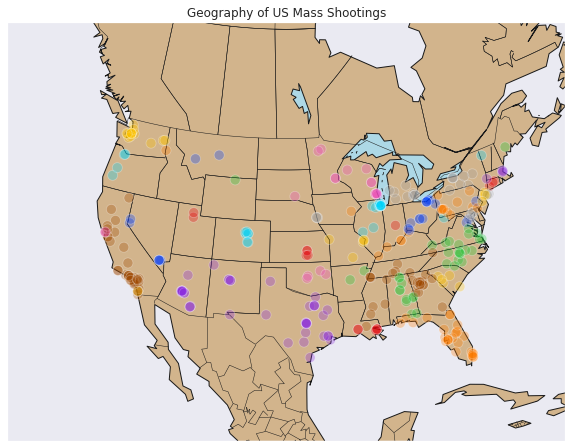

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue', zorder=0)
plt.title("Geography of US Mass Shootings")
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawcountries(linewidth=0.5, linestyle='solid', color='k' )
x, y = m(df['Longitude'].tolist(), df['Latitude'].tolist()) 
g=sns.scatterplot(x, y, hue='State',s=100, data=df, palette="bright", zorder=20,alpha=0.3)
g.legend_.remove()
#plt.scatter(x,y,marker='o', color='Red',alpha =0.1,s=2)
plt.show()

In [73]:
#create counts of data for plotting categorical variables
Gender = np.unique(df['Gender'], return_counts=True)
Ocurrence = np.unique(df['Ocurrence'], return_counts=True)
print('Gender = {}\n'.format(Gender))
print('Ocurrence = {}\n'.format(Ocurrence))

Gender = (array(['-999', 'Female', 'Male', 'Male and Female'], dtype=object), array([ 20,   6, 309,   4]))

Ocurrence = (array(['-999', 'Close', 'Open', 'Open+CLose', 'Open+Close'], dtype=object), array([ 52, 192,  76,   1,  18]))



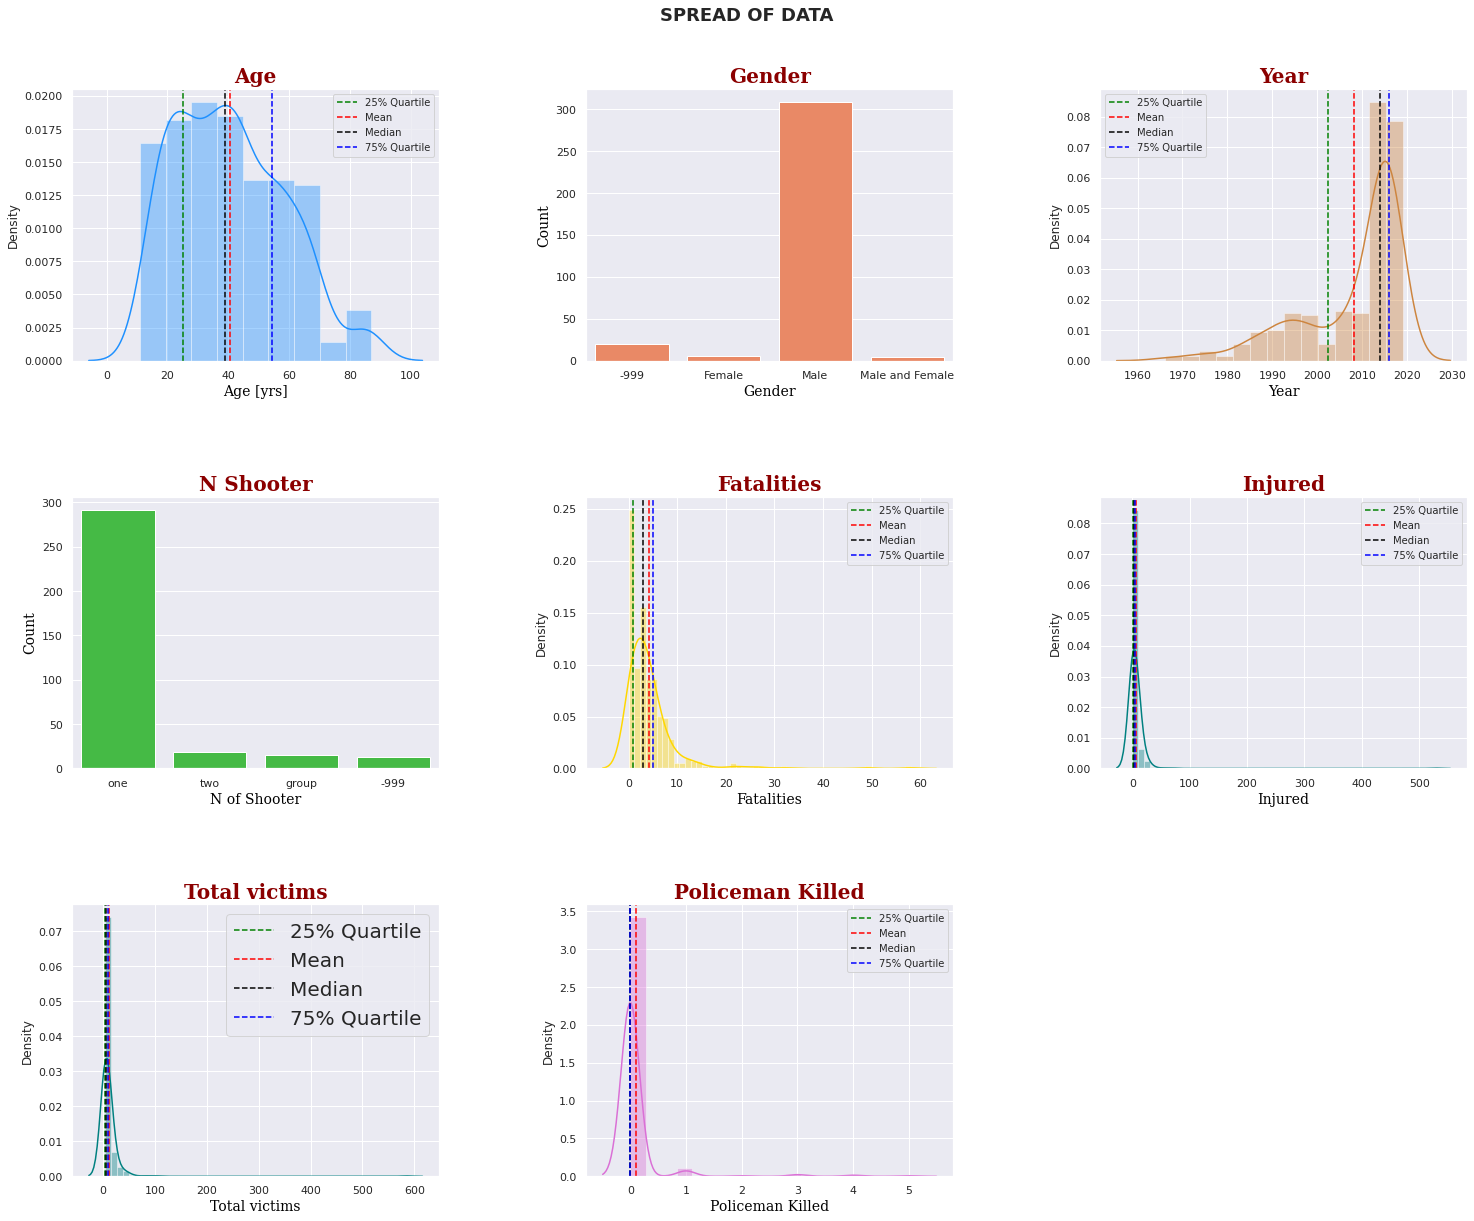

In [19]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 20
        }

axlab_dict = {'family': 'serif',
              'color': 'black',
              'size': 14
              }

#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[25,19]);
fig.suptitle("SPREAD OF DATA", fontsize=18, fontweight='bold');
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);

#load plots into subplots, and set plot parameters
ax0 = fig.add_subplot(3, 3, 1);
sns.distplot(df['Age'], ax=ax0, color='dodgerblue');
ax0.axvline(df['Age'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax0.axvline(df['Age'].mean(),color='red',linestyle='--',label='Mean');
ax0.axvline(df['Age'].median(),color='black',linestyle='--',label='Median');
ax0.axvline(df['Age'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax0.set_title('Age', fontdict=axtitle_dict);
ax0.set_xlabel('Age [yrs]', fontdict=axlab_dict);
ax0.legend(fontsize=10);

ax1 = fig.add_subplot(3, 3, 2);
sns.barplot(x=list(Gender[0]), y=list(Gender[1]), ax=ax1, color='coral');
ax1.set_title('Gender', fontdict=axtitle_dict);
ax1.set_xlabel('Gender', fontdict=axlab_dict);
ax1.set_ylabel('Count', fontdict=axlab_dict);

ax2 = fig.add_subplot(3, 3, 3);
sns.distplot(df['Year'], ax=ax2, color='peru');
ax2.axvline(df['Year'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax2.axvline(df['Year'].mean(),color='red',linestyle='--',label='Mean');
ax2.axvline(df['Year'].median(),color='black',linestyle='--',label='Median');
ax2.axvline(df['Year'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax2.set_title('Year', fontdict=axtitle_dict);
ax2.set_xlabel('Year', fontdict=axlab_dict);
ax2.legend(fontsize=10);

ax3 = fig.add_subplot(3, 3, 4);
sns.countplot(df['N Shooter'], ax=ax3, color='limegreen');
ax3.set_title('N Shooter', fontdict=axtitle_dict);
ax3.set_xlabel('N of Shooter', fontdict=axlab_dict);
ax3.set_ylabel('Count', fontdict=axlab_dict);

ax4 = fig.add_subplot(3, 3, 5);
sns.distplot(df['Fatalities'], ax=ax4, color='gold');
ax4.axvline(df['Fatalities'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax4.axvline(df['Fatalities'].mean(),color='red',linestyle='--',label='Mean');
ax4.axvline(df['Fatalities'].median(),color='black',linestyle='--',label='Median');
ax4.axvline(df['Fatalities'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax4.set_title('Fatalities', fontdict=axtitle_dict);
ax4.set_xlabel('Fatalities', fontdict=axlab_dict);
ax4.legend(fontsize=10);

ax5 = fig.add_subplot(3, 3, 6);
sns.distplot(df['Injured'], ax=ax5, color='teal');
ax5.axvline(df['Injured'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax5.axvline(df['Injured'].mean(),color='red',linestyle='--',label='Mean');
ax5.axvline(df['Injured'].median(),color='black',linestyle='--',label='Median');
ax5.axvline(df['Injured'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax5.set_title('Injured', fontdict=axtitle_dict);
ax5.set_xlabel('Injured', fontdict=axlab_dict);
ax5.legend(fontsize=10);

ax6 = fig.add_subplot(3, 3, 7);
sns.distplot(df['Total victims'], ax=ax6, color='teal');
ax6.axvline(df['Total victims'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax6.axvline(df['Total victims'].mean(),color='red',linestyle='--',label='Mean');
ax6.axvline(df['Total victims'].median(),color='black',linestyle='--',label='Median');
ax6.axvline(df['Total victims'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax6.set_title('Total victims', fontdict=axtitle_dict);
ax6.set_xlabel('Total victims', fontdict=axlab_dict);
ax6.legend(fontsize=10);

ax7 = fig.add_subplot(3, 3, 8);
sns.distplot(df['Policeman Killed'], ax=ax7, color='orchid');
ax7.axvline(df['Policeman Killed'].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile');
ax7.axvline(df['Policeman Killed'].mean(),color='red',linestyle='--',label='Mean');
ax7.axvline(df['Policeman Killed'].median(),color='black',linestyle='--',label='Median');
ax7.axvline(df['Policeman Killed'].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile');
ax7.set_title('Policeman Killed', fontdict=axtitle_dict);
ax7.set_xlabel('Policeman Killed', fontdict=axlab_dict);
ax7.legend(fontsize=10);


# **Hypothesis Testing** 

I want to examine whether there is a significant difference in the proportion of US Mass Shootings Fatalities before and after 1991. Now It is time to prepare our data. 

There is an incident in October 1991 with a significance important in terms of how it happened, and the boomerang effect is created with the public opinion, society, and local authorities. 

https://en.wikipedia.org/wiki/Luby%27s_shooting

First, I will be separating our data into two groups: before 1991 and after 1991 to prepare our Hypothesis testing.



In [79]:
before_1991 = df[df["Year"] < 1991]
after_1991 =  df[df["Year"] >= 1991]

In [165]:
before_1991.describe()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Latitude,Longitude,Year.1,Unnamed: 27
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,0.0
mean,141.909091,5.060606,7.030303,12.090909,0.151515,31.363636,-696.121212,35.731905,-98.517247,1982.272727,NaN
std,100.084765,5.147447,7.584873,10.924066,0.712444,14.028583,466.460459,5.630875,16.497207,6.801988,NaN
min,8.000000,0.000000,1.000000,3.000000,0.000000,14.000000,-999.000000,25.796539,-122.323646,1966.000000,NaN
25%,41.000000,1.000000,2.000000,4.000000,0.000000,18.000000,-999.000000,32.794806,-117.072253,1979.000000,NaN
50%,144.000000,3.000000,4.000000,8.000000,0.000000,29.000000,-999.000000,34.176221,-96.766311,1984.000000,NaN
75%,244.000000,7.000000,9.000000,14.000000,0.000000,41.000000,0.000000,38.249432,-82.710580,1988.000000,NaN
max,296.000000,21.000000,32.000000,48.000000,4.000000,59.000000,1.000000,47.673674,-73.939513,1990.000000,NaN


In [166]:
after_1991.describe()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Latitude,Longitude,Year.1,Unnamed: 27
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,0.0
mean,173.029412,4.153595,6.238562,10.392157,0.094771,41.601307,-822.591503,37.218369,-94.041304,2010.872549,NaN
std,97.461194,5.754480,30.692530,34.570761,0.506520,18.125370,381.710181,5.493115,16.507033,7.697142,NaN
min,1.000000,0.000000,0.000000,3.000000,0.000000,11.000000,-999.000000,21.325512,-161.792752,1991.000000,NaN
25%,91.250000,1.000000,1.000000,4.000000,0.000000,26.000000,-999.000000,33.571459,-106.735742,2008.000000,NaN
50%,170.500000,3.000000,3.000000,5.000000,0.000000,40.000000,-999.000000,37.144751,-87.967244,2015.000000,NaN
75%,261.750000,5.000000,5.000000,8.000000,0.000000,55.000000,-999.000000,41.387692,-81.465705,2016.000000,NaN
max,339.000000,58.000000,527.000000,585.000000,5.000000,87.000000,1.000000,60.790539,-69.707823,2019.000000,NaN


Compare the distributions of the two samples. They appear to be approximately normal, with varying levels of kurtosis.

Text(0.5, 1.0, 'Distribution of Fatalities 1966 - 1990')

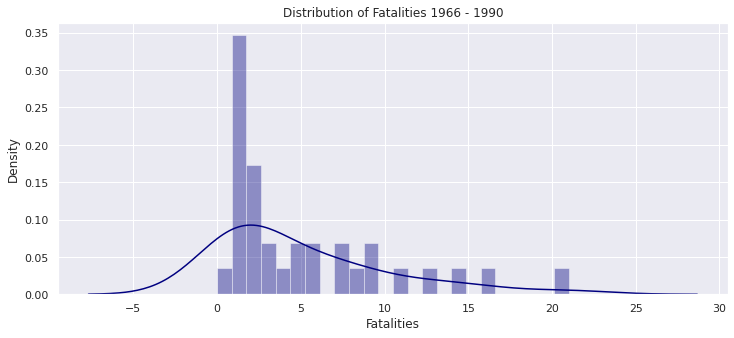

In [80]:
fig, ax = plt.subplots(1,figsize=(12,5))
sns.distplot(before_1991['Fatalities'], bins=24, color='navy')
ax.set_title('Distribution of Fatalities 1966 - 1990')

Text(0.5, 1.0, 'Distribution of Fatalities 1991 - 2019')

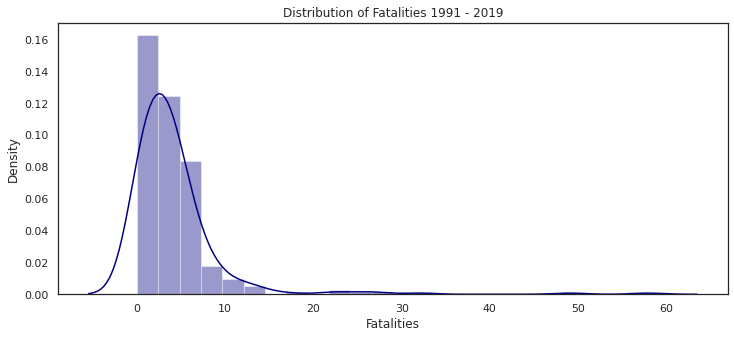

In [197]:
fig, ax = plt.subplots(1,figsize=(12,5))
sns.distplot(after_1991['Fatalities'], bins=24, color='navy')
ax.set_title('Distribution of Fatalities 1991 - 2019')

**Creating our Hypothesis**

Objective 1: 

I want to examine whether there is a significant difference in the proportion of US Mass Shootings Fatalities  before and after 1991.

This is my Hypothesis: 

Ho: p1 - p2 = 0

Ha: p1 - p2 ≠ 0


In [81]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

sm.stats.ztest(x1=before_1991['Fatalities'], x2=after_1991['Fatalities'])

(0.8685300117010818, 0.38510425005581284)

Thus, we can conclude based on the P-value that we fail to reject the Null Hypothesis, but let´s dig in: 

In [82]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = before_1991.shape[0]
sample_2_n = after_1991.shape[0]
sample_1_mean = before_1991['Fatalities'].mean()
sample_2_mean = after_1991['Fatalities'].mean()
sample_1_var = before_1991['Fatalities'].var()
sample_2_var = after_1991['Fatalities'].var()

import math

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -2.7778939933754003 and 0.96387141464694.


In [201]:
#Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(before_1991['Fatalities'], after_1991['Fatalities']))

Cohen's d is: 0.16613732935600223.


Cohen's d result is considered to have a small correlation. This means that if the difference between two groups' means is less than 0.2 standard deviations, the difference is negligible.


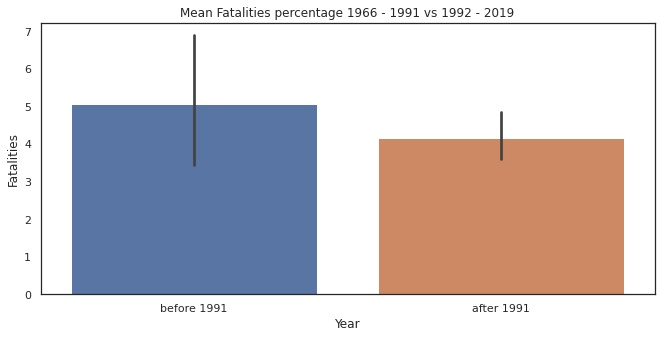

In [205]:
submissions_test= pd.concat([before_1991, after_1991])

plt.figure(figsize = (11,5))
sns.barplot(x="Year", y="Fatalities", data=submissions_test)
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.title('Mean Fatalities percentage 1966 - 1991 vs 1992 - 2019');

Based on this results, I reject the null Hypothesis. I do not have any evidence to conclude that the variable Year has an effect with the number of Fatalities.

Objective 2: 

**Does Mental Health Issues & Age play a role in the occurrence of Mass Shootings?**

Ho: p1 - p2 = 0 There is no difference between the Mental Health Issues and Age.

Ha: p1 - p2 ≠ 0 There is difference between the Mental Health Issues and Age. 


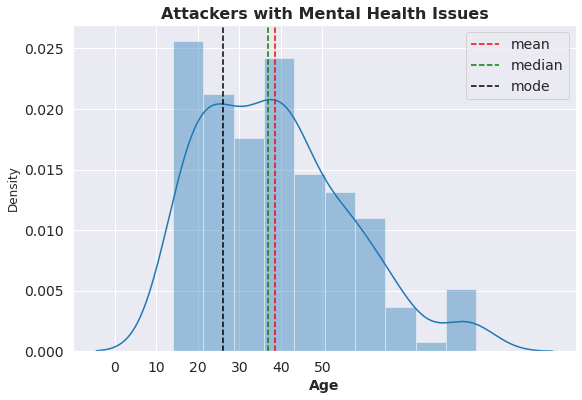

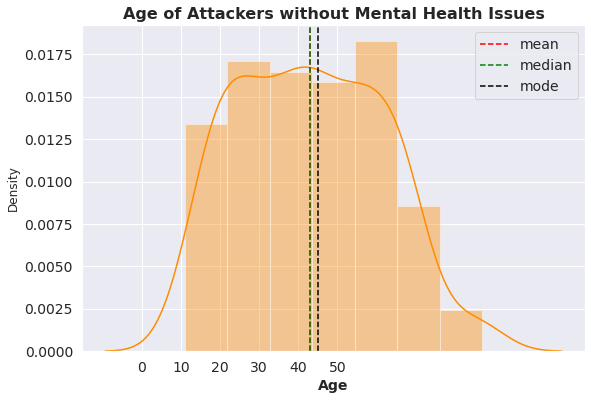

In [9]:
# get needed data
x1 = df.loc[df['Mental Health Issues'] == 'Yes', 'Age']     # Age of Attackers with Mental Health Issues
x2 = df.loc[df['Mental Health Issues'] == 'No', 'Age']       # Age of Attackers without Mental Health Issues

# reset index
x1.reset_index(drop=True, inplace=True)
x2.reset_index(drop=True, inplace=True)

#histogram of Attackers Age with Mental Health Issues
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.distplot(x1, color='tab:blue');
ax0.axvline(np.mean(x1),color='red',linestyle='--', label='mean')
ax0.axvline(np.median(x1),color='green',linestyle='--', label='median')
ax0.axvline(stats2.mode(x1),color='black',linestyle='--', label='mode')
plt.xlabel('Age', fontsize='14', fontweight='bold');
plt.title('Age of Attackers with Mental Health Issues', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax0.set_xticks(np.arange(0,60,10));

# histogram of Attackers Age without Mental Health Issues
fig2 = plt.figure(figsize=[9,6]);
ax1 = sns.distplot(x2, color='darkorange');
ax1.axvline(np.mean(x2),color='red',linestyle='--', label='mean')
ax1.axvline(np.median(x2),color='green',linestyle='--', label='median')
ax1.axvline(stats2.mode(x2),color='black',linestyle='--', label='mode')
plt.xlabel('Age', fontsize='14', fontweight='bold');
plt.title('Age of Attackers without Mental Health Issues', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax1.set_xticks(np.arange(0,60,10));

To check the importance of Shapiro-Wilks Test & Bartlett's test:

https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm

https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm

In [15]:
#test for normality of sample data using both Shapiro-Wilks Test and Anderson-Darling Test
statistic1, pval1 = stats.shapiro(x1)
statistic2, pval2 = stats.shapiro(x2)
astat1, crit1, sig1 = stats.anderson(x1, dist='norm')
astat2, crit2, sig2 = stats.anderson(x2, dist='norm')
#print results
blah1 = astat1/crit1[4]
blah2 = astat2/crit2[4]
print("Shapiro-Wilks test")
print('Age of Attackers with Mental Health Issues:  p-value: %.8f' % pval1)
print('Age of Attackers without Mental Health Issues:    p-value: %.8f' % pval2)
print('\nAnderson-Darling Test')
print('Age of Attackers with Mental Health Issues:  Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah1)
print('Age of Attackers without Mental Health Issues:    Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah2)
print('\nNumber of samples:')
print('Age of Attackers with Mental Health Issues:  n = {}' .format(len(x1)))
print('Age of Attackers without Mental Health Issues:    n = {}' .format(len(x2)))

Shapiro-Wilks test
Age of Attackers with Mental Health Issues:  p-value: 0.00000253
Age of Attackers without Mental Health Issues:    p-value: 0.00120108

Anderson-Darling Test
Age of Attackers with Mental Health Issues:  Anderson-Darling statistic is 1.92 times the critical value for alpha = 0.01
Age of Attackers without Mental Health Issues:    Anderson-Darling statistic is 1.24 times the critical value for alpha = 0.01

Number of samples:
Age of Attackers with Mental Health Issues:  n = 187
Age of Attackers without Mental Health Issues:    n = 151


In [11]:
#use Bartlett's test for equality of variance because the data is approximately normal
stat, pval = stats.bartlett(x1, x2)

if pval < 0.05:
    print('Reject Null Hypothesis: the variances are not equal for at least one pair.\np-value: %.4f' % pval)
else:
    print('Fail to Reject Null Hypothesis: the variances are equal across all samples.\np-value: %.4f' % pval)

Fail to Reject Null Hypothesis: the variances are equal across all samples.
p-value: 0.4629


In [16]:
#Student's Two-Sample t-test
statistic, pval = stats.ttest_ind(x1, x2, equal_var = True) #should use alternative='two-sided' in newer versions of scipy (> 1.4.1)

if pval < 0.05:
    print('Reject Null Hypothesis: the Age of Attacker with Mental Health problems is statistically different than the Age of attackers without Mental Health problems.\np-value: %.4f' % pval)
else:
    print('Fail to Reject Null Hypothesis: the Age of Attacker with and without Mental Health problems are not statistically different.\np-value: %.4f' % pval)

Reject Null Hypothesis: the Age of Attacker with Mental Health problems is statistically different than the Age of attackers without Mental Health problems.
p-value: 0.0280


# **Conclusions & Key insights**

*   First, I conducted a z-test and I rejected the null Hypothesis. Stating that there is no significance evidence before and after the Year 1991 in terms of Fatalities. 

*   Are there any statitically differences between the Age and those attackers with/without Mental Healt Issues? 

Reject Null Hypothesis: the Age of Attacker with Mental Health problems is statistically different than the Age of attackers without Mental Health problems.

My final conclusion based on the research of the topic is that mental health plays a role in Gun Violence. More significant is the male participation in the US Shootings, and without any doubt, Age is a factor to consider but less likely to be a trigger. 


**Potential Impact of Findings**

This project aims to provide the Local government, State Authorities, and the Society with enough knowledge, tools, and insights to study the pattern/s of US Mass Shootings between 1996 and 2019. Setting our research will clarify and compare where the violence happened and contrast with those places with low violence across the US.

**Directions of the findings to make better decisions:**

Local Government: implementation of better programs and tools to tackle violence.

Targeting those places, cities, states that demonstrated high levels of violence (patterns) and creating educational programs for the population. 
Mental Health problems: identifying and creating more complex preventive measures (for accessing guns) for those with mental problems.
Gender, Age: targeting these variables will help us creating focused programs and more effective ways to prevent Mass Shootings with cost-effective tools and resources.


This topic requires more research in terms of having an objective conclusion, and as I improve my skills as a Data Analyst, I will be able to perform more immeasurable. As well, we cannot forget the importance of Gun violence in our society and how it impacts in our daily activities and lives (even without noticing it).





